In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'unicode_escape')
df.shape

(11251, 15)

In [9]:
df.head()

NameError: name 'df' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop Blank or unnamed columns
df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [8]:
# Chekc for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Delete null values
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
# Change Data type
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtype    

dtype('int32')

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
df[['Amount']].describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


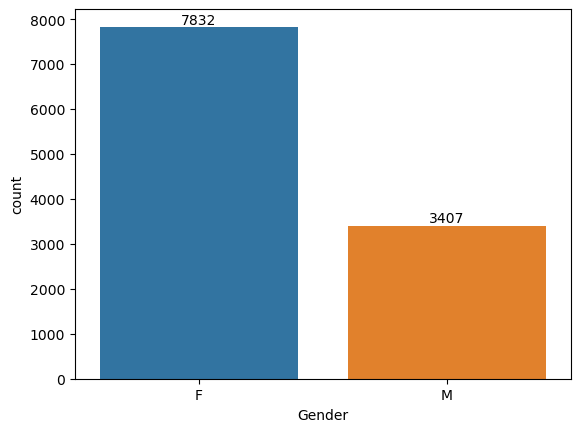

In [21]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

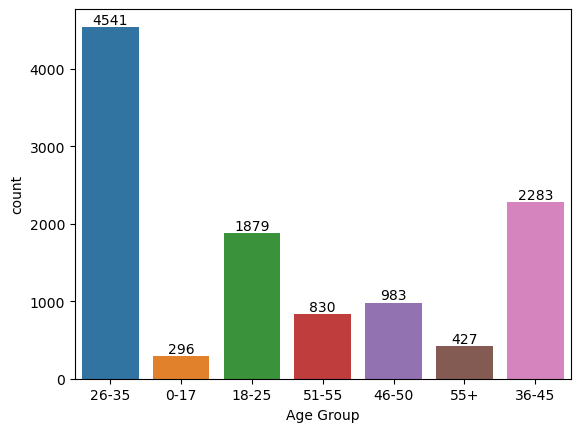

In [26]:
px = sns.countplot(x = 'Age Group', data = df)
for bars in px.containers:
    px.bar_label(bars)

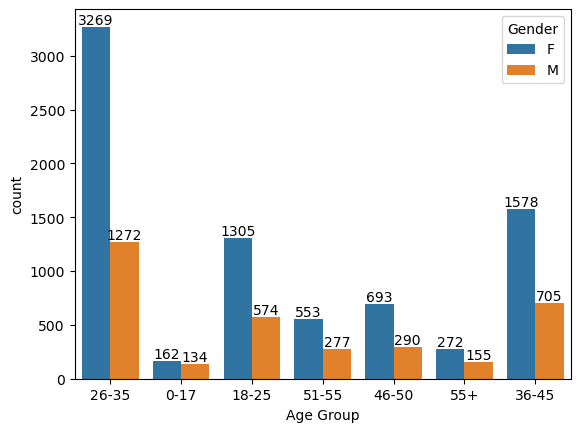

In [30]:
ax = sns.countplot(data = df, x = 'Age Group', hue ='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

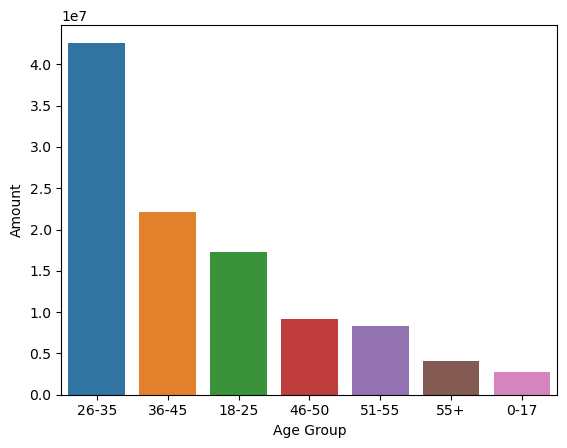

In [43]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
sales_age= sales_age.sort_values(by = 'Amount',ascending = False)
sns.barplot(x='Age Group',y='Amount',data = sales_age)

<AxesSubplot:xlabel='State', ylabel='Orders'>

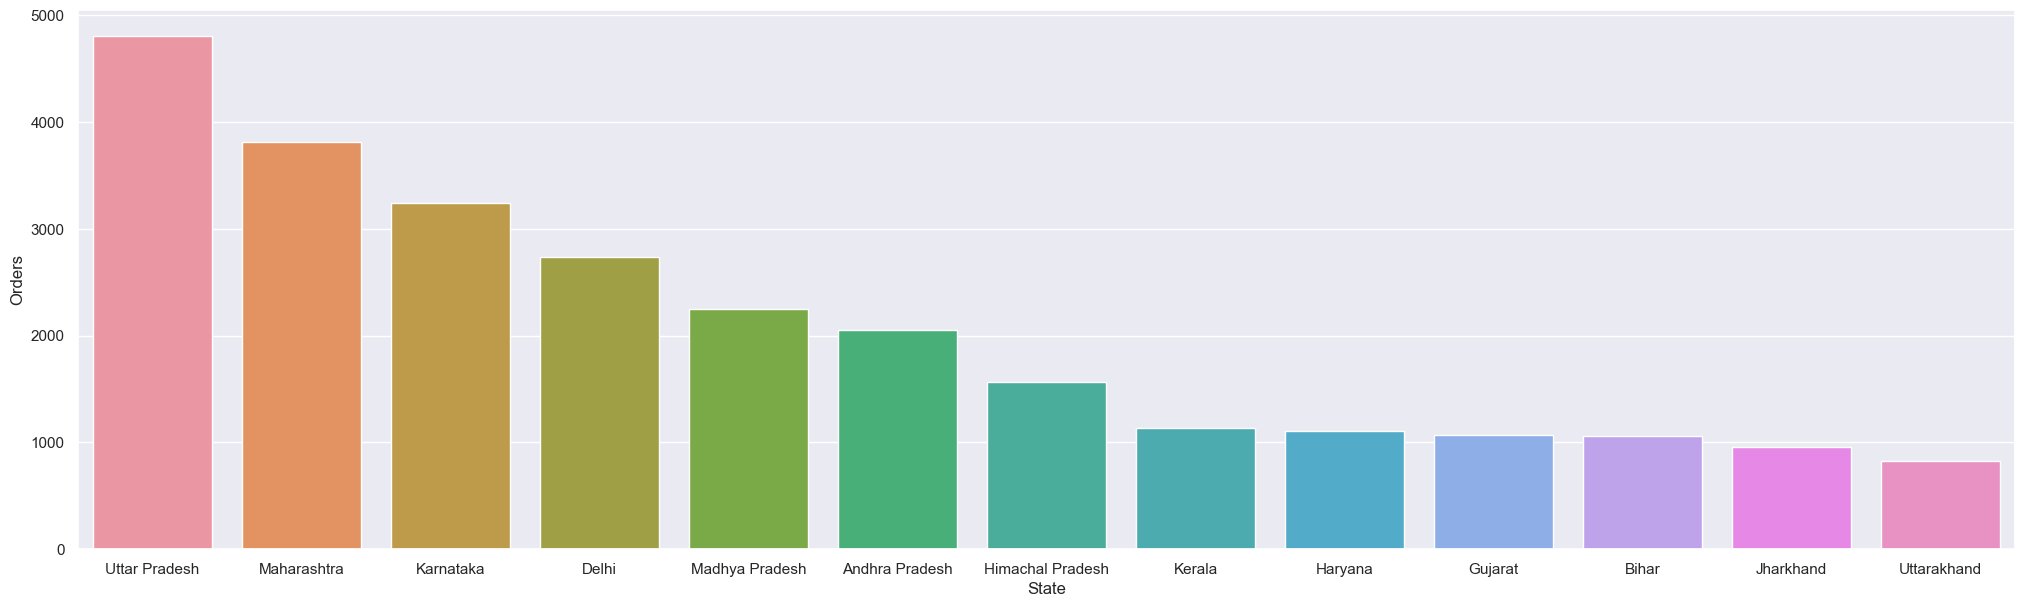

In [70]:
sales_state= df.groupby(['State'], as_index = False)['Orders'].sum()
sales_state = sales_state.sort_values(by ='Orders', ascending = False).head(13)
sns.set(rc = {'figure.figsize':(25,7)})
sns.barplot(data = sales_state, x='State',y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

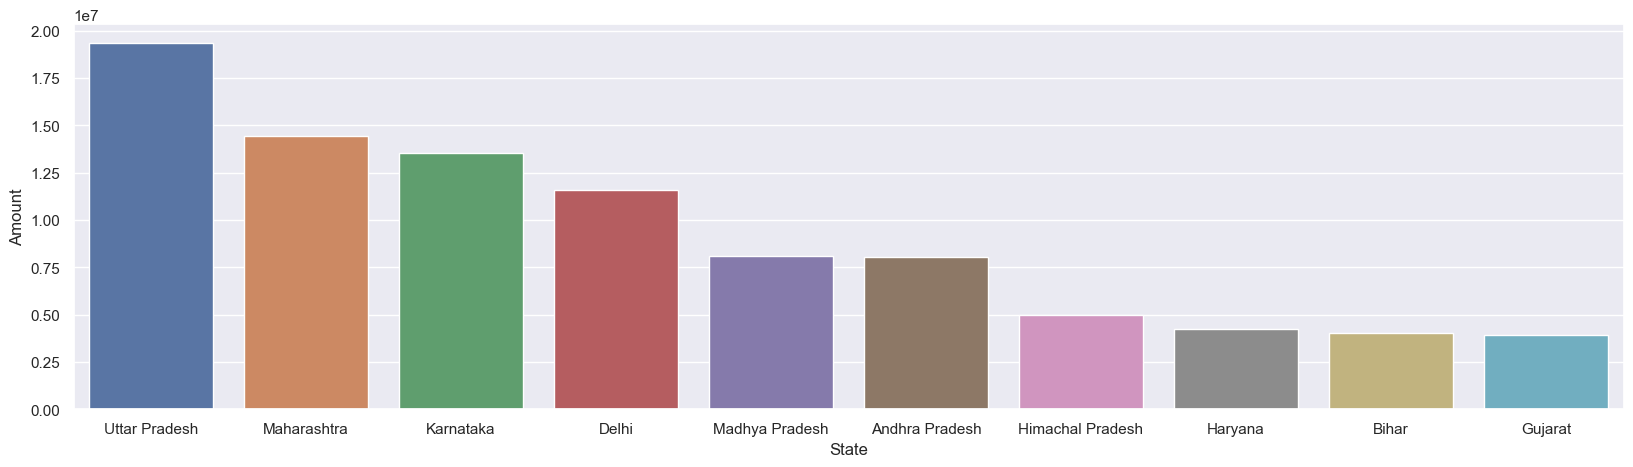

In [99]:
sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum()
sales_state = sales_state.sort_values(by = ['Amount'], ascending = False).head(10)
sns.barplot(data = sales_state, x = 'State', y ='Amount')


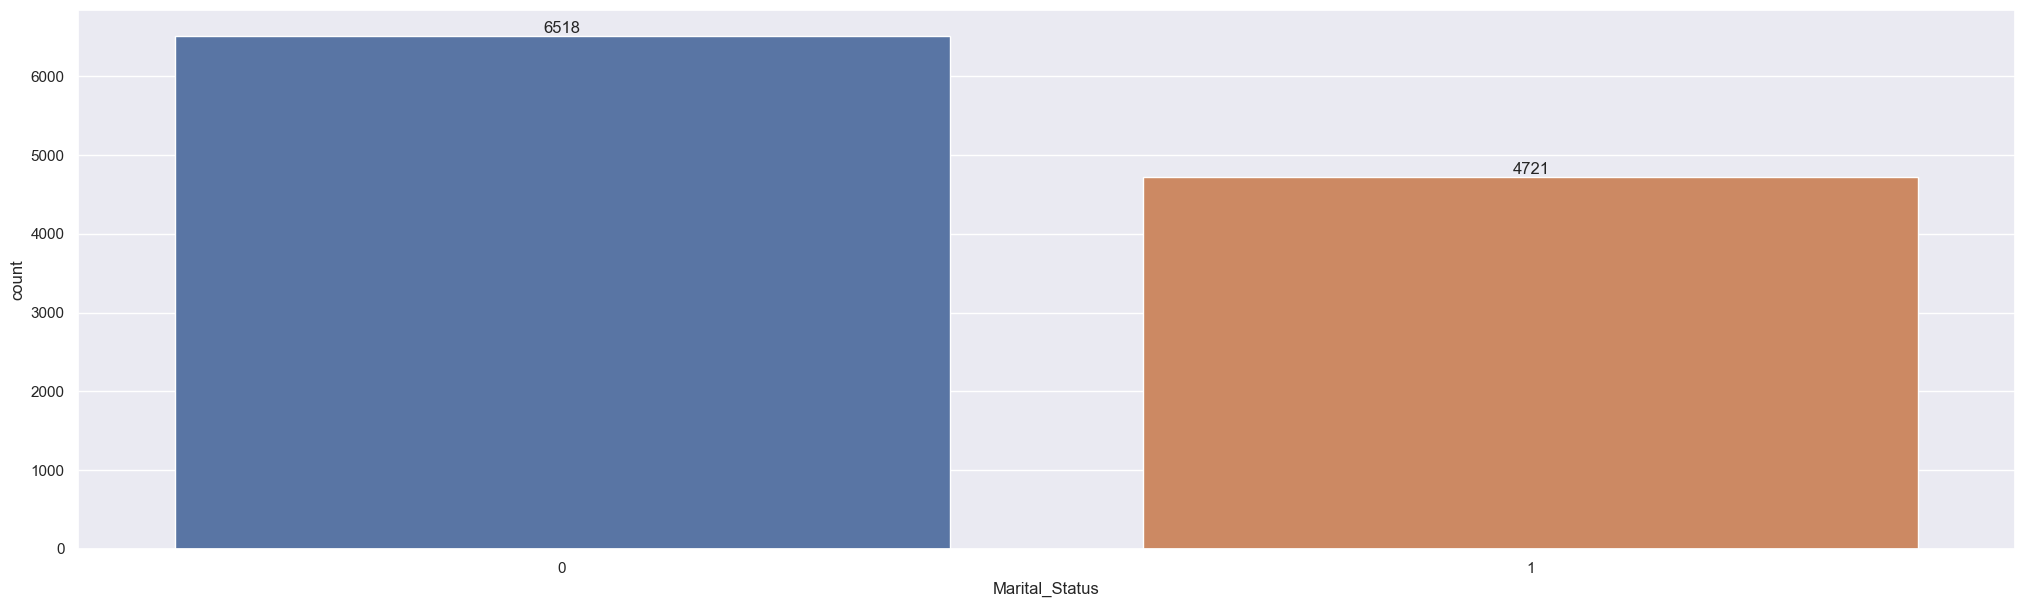

In [79]:
ax = sns.countplot(data = df,x = 'Marital_Status')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

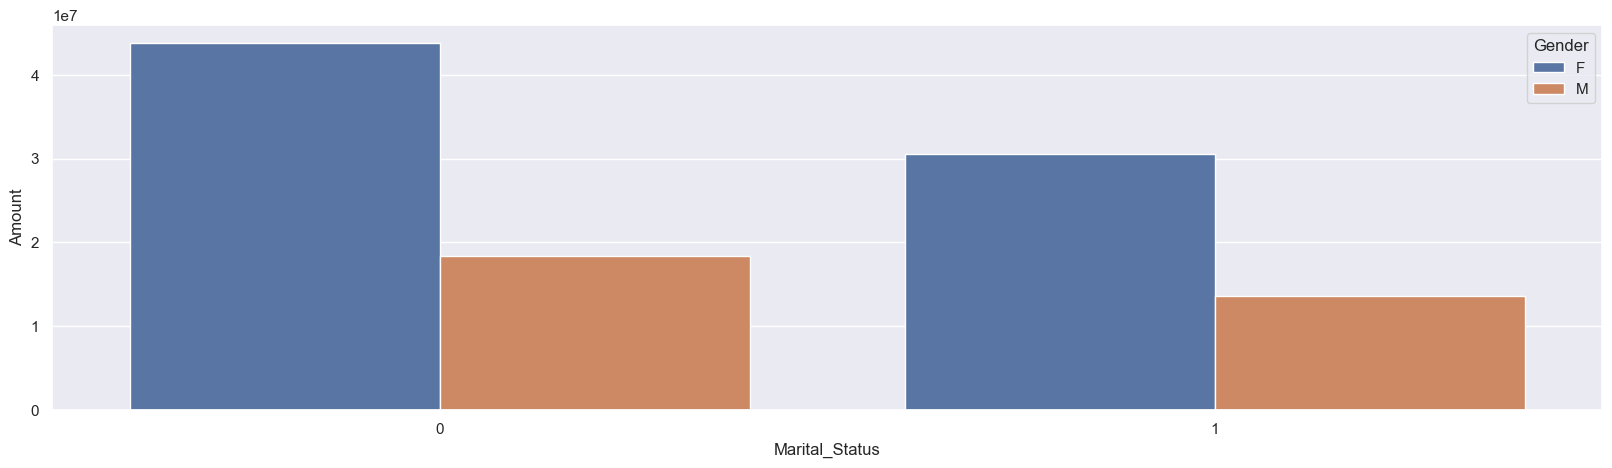

In [100]:
sales_married = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum()
sales_married = sales_married.sort_values(by = ['Amount'], ascending = False)
sns.barplot(data=sales_married, x='Marital_Status', y='Amount', hue='Gender')



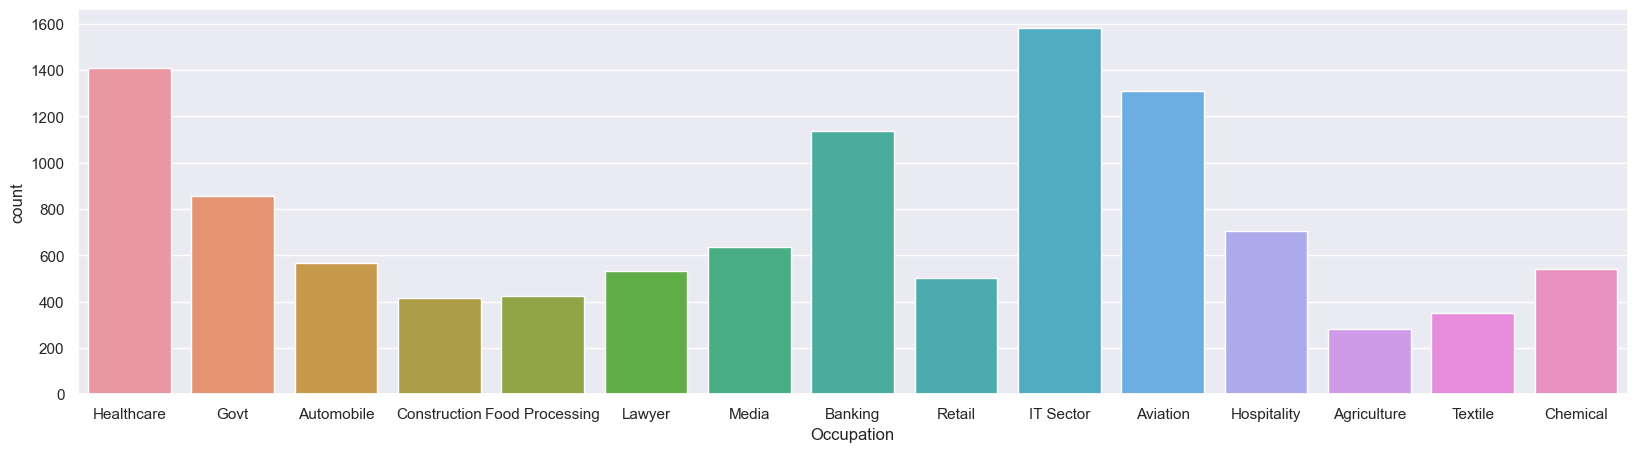

In [93]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.countplot(data = df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

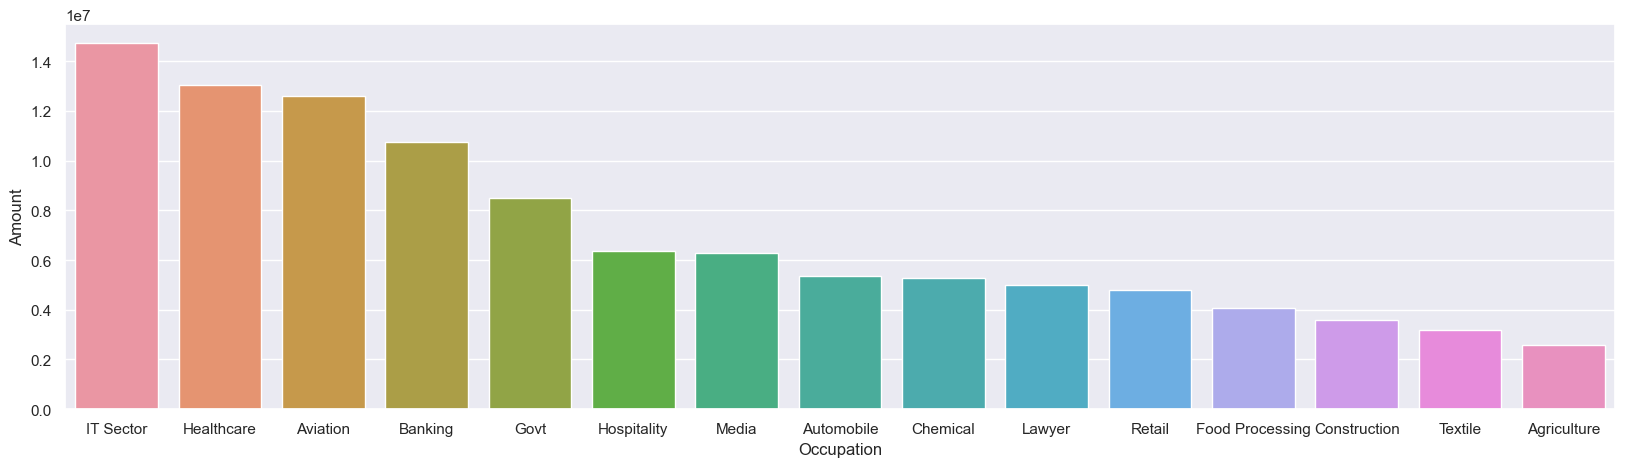

In [103]:
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum()
sales_occ = sales_occ.sort_values(by = ['Amount'], ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_occ, x='Occupation', y='Amount')

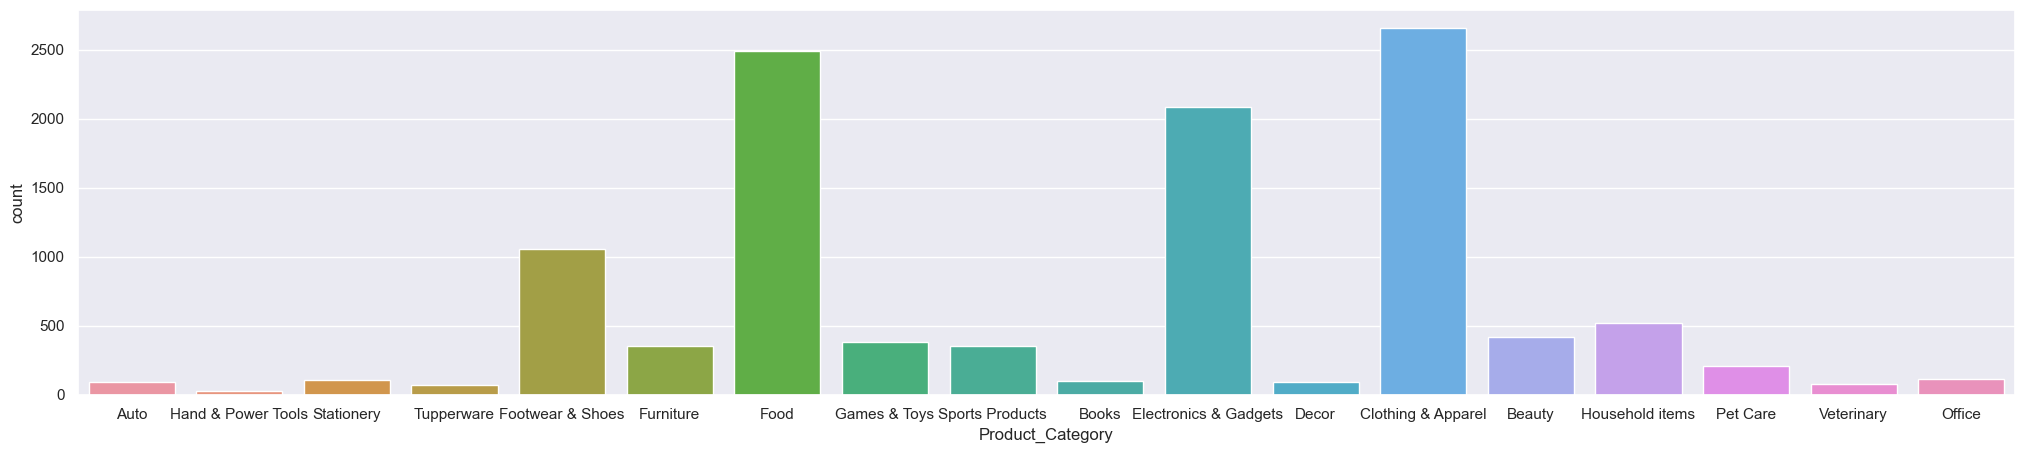

In [105]:
sns.set(rc = {'figure.figsize':(25,5)})
sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

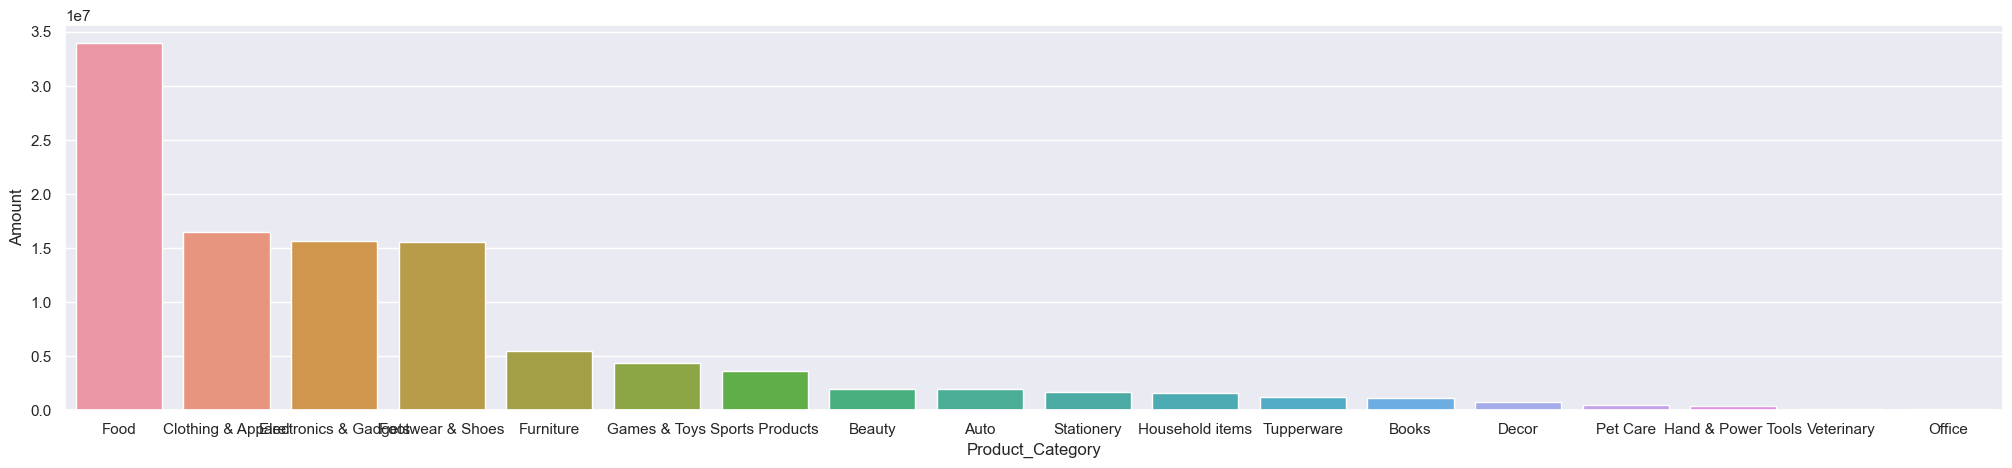

In [107]:
sales_cat = df.groupby(['Product_Category'], as_index = False)['Amount'].sum()
sales_cat = sales_cat.sort_values(by = ['Amount'], ascending = False)
sns.barplot(data=sales_cat, x='Product_Category',y='Amount')